## Installations et importations

In [ ]:
!pip install h5py validators tqdm numpy argparse requests
!pip install colorama

  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from zipfile import ZipFile
data_path = "/content/gdrive/MyDrive/project_sdk_and_notebook_unzip_me.zip"
audio_data_path = "/content/gdrive/MyDrive/Raw.zip"
with ZipFile(data_path, 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()
with ZipFile(audio_data_path, 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [ ]:
import h5py
from mmsdk import mmdatasdk
import ast
import os
import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import torch
from torchvision import datasets, transforms
import torch.utils.data as data_utils
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
import torch.nn.functional as F
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from torch import nn
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers
from sklearn import preprocessing
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from zipfile import ZipFile
from google.colab import drive
from torch import nn
import torchaudio 
from torchsummary import summary
from torch.utils.data import Dataset,DataLoader
import librosa
import librosa.display
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn import tree
from tensorflow.keras.layers import Activation
from keras.callbacks import History 

## Téléchargement de données

In [ ]:
print(mmdatasdk.cmu_mosi.highlevel)
cmumosi_highlevel = mmdatasdk.mmdataset(mmdatasdk.cmu_mosi.highlevel,'cmumosi/')

{'glove_vectors': 'http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/language/CMU_MOSI_TimestampedWordVectors.csd', 'FACET_4.1': 'http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/visual/CMU_MOSI_Visual_Facet_41.csd', 'FACET_4.2': 'http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/visual/CMU_MOSI_Visual_Facet_42.csd', 'OpenSmile-emobase2010': 'http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/acoustic/CMU_MOSI_OpenSmile_EB10.csd', 'OpenSMILE': 'http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/acoustic/CMU_MOSI_openSMILE_IS09.csd', 'OpenFace_1': 'http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/visual/CMU_MOSI_Visual_OpenFace_1.csd', 'OpenFace_2': 'http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/visual/CMU_MOSI_Visual_OpenFace_2.csd', 'COVAREP': 'http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/acoustic/CMU_MOSI_COVAREP.csd'}
[2022-02-26 13:07:59.273] | Error   | cmumosi/CMU_MOSI_TimestampedWordVectors.csd file already exists ...


RuntimeError: ignored

In [ ]:
cmumosi_highlevel.add_computational_sequences(mmdatasdk.cmu_mosi.labels,'cmumosi/')

[2022-02-26 13:07:59.661] | Warning | Dataset already contains <Opinion Segment Labels> computational sequence ...
[2022-02-26 13:07:59.662] | Error   | cmumosi/CMU_MOSI_Opinion_Labels.csd file already exists ...


RuntimeError: ignored

In [ ]:
cmumosi_highlevel.align('Opinion Segment Labels')

## Lecture des labels

In [ ]:
filename = "cmumosi/CMU_MOSI_Opinion_Labels.csd"

f_ = h5py.File(filename, 'r')
f_.visit(print)

Opinion Segment Labels
Opinion Segment Labels/data
Opinion Segment Labels/data/03bSnISJMiM
Opinion Segment Labels/data/03bSnISJMiM/features
Opinion Segment Labels/data/03bSnISJMiM/intervals
Opinion Segment Labels/data/0h-zjBukYpk
Opinion Segment Labels/data/0h-zjBukYpk/features
Opinion Segment Labels/data/0h-zjBukYpk/intervals
Opinion Segment Labels/data/1DmNV9C1hbY
Opinion Segment Labels/data/1DmNV9C1hbY/features
Opinion Segment Labels/data/1DmNV9C1hbY/intervals
Opinion Segment Labels/data/1iG0909rllw
Opinion Segment Labels/data/1iG0909rllw/features
Opinion Segment Labels/data/1iG0909rllw/intervals
Opinion Segment Labels/data/2WGyTLYerpo
Opinion Segment Labels/data/2WGyTLYerpo/features
Opinion Segment Labels/data/2WGyTLYerpo/intervals
Opinion Segment Labels/data/2iD-tVS8NPw
Opinion Segment Labels/data/2iD-tVS8NPw/features
Opinion Segment Labels/data/2iD-tVS8NPw/intervals
Opinion Segment Labels/data/5W7Z1C_fDaE
Opinion Segment Labels/data/5W7Z1C_fDaE/features
Opinion Segment Labels/dat

In [ ]:
example_file = '03bSnISJMiM'
example_file_labels = f_['Opinion Segment Labels/data/' + example_file + '/features']
example_file_intervals = f_['Opinion Segment Labels/data/' + example_file + '/intervals']
print('Example file:', example_file)
print('Start   End  Label')
for [start, end], label in zip(example_file_intervals, example_file_labels):
    print("%.1f"%float(start), '-', "%.1f"%float(end), ':', "%.2f"%float(label))

Example file: 03bSnISJMiM
Start   End  Label
51.9 - 55.9 : 2.40
56.0 - 66.8 : -0.80
66.8 - 68.7 : -1.00
68.7 - 70.5 : -1.75
70.5 - 71.7 : 0.00
71.7 - 72.9 : 0.00
72.9 - 77.8 : 0.80
77.8 - 89.5 : 0.00
89.5 - 92.2 : 0.20
92.2 - 94.8 : -1.20
94.8 - 96.6 : -0.50
96.6 - 99.0 : 2.20
168.7 - 170.2 : 1.80


## Lecture des features

In [ ]:
filename = "cmumosi/CMU_MOSI_OpenSmile_EB10.csd" # audio features from OpenSmile

f = h5py.File(filename, 'r')
f.visit(print)

OpenSmile_emobase2010
OpenSmile_emobase2010/data
OpenSmile_emobase2010/data/03bSnISJMiM
OpenSmile_emobase2010/data/03bSnISJMiM/features
OpenSmile_emobase2010/data/03bSnISJMiM/intervals
OpenSmile_emobase2010/data/0h-zjBukYpk
OpenSmile_emobase2010/data/0h-zjBukYpk/features
OpenSmile_emobase2010/data/0h-zjBukYpk/intervals
OpenSmile_emobase2010/data/1DmNV9C1hbY
OpenSmile_emobase2010/data/1DmNV9C1hbY/features
OpenSmile_emobase2010/data/1DmNV9C1hbY/intervals
OpenSmile_emobase2010/data/1iG0909rllw
OpenSmile_emobase2010/data/1iG0909rllw/features
OpenSmile_emobase2010/data/1iG0909rllw/intervals
OpenSmile_emobase2010/data/2WGyTLYerpo
OpenSmile_emobase2010/data/2WGyTLYerpo/features
OpenSmile_emobase2010/data/2WGyTLYerpo/intervals
OpenSmile_emobase2010/data/2iD-tVS8NPw
OpenSmile_emobase2010/data/2iD-tVS8NPw/features
OpenSmile_emobase2010/data/2iD-tVS8NPw/intervals
OpenSmile_emobase2010/data/5W7Z1C_fDaE
OpenSmile_emobase2010/data/5W7Z1C_fDaE/features
OpenSmile_emobase2010/data/5W7Z1C_fDaE/intervals

In [ ]:
example_file_OpenSmile_emobase2010_features = f['OpenSmile_emobase2010/data/' + example_file + '/features']
print("Feature size for the example file (nbsegments x nb_features): ", example_file_OpenSmile_emobase2010_features.shape)

# Print the value of pcm_loudness_sma_maxPos on the first segment of the example file
print("Value of pcm_loudness_sma_maxPos on the first segment of the example file: ", example_file_OpenSmile_emobase2010_features[0, 2])

Feature size for the example file (nbsegments x nb_features):  (13, 1585)
Value of pcm_loudness_sma_maxPos on the first segment of the example file:  0.7815385


In [ ]:
example_file_OpenSmile_emobase2010_intervals = f['OpenSmile_emobase2010/data/' + example_file + '/intervals']
print("Feature size for the example file (nbsegments x nb_features): ", example_file_OpenSmile_emobase2010_intervals.shape)
print(example_file_OpenSmile_emobase2010_intervals[0, 0])

Feature size for the example file (nbsegments x nb_features):  (13, 2)
51.904533


## Lecture des Fichiers .wav

In [ ]:
audio_wav_path = "/content/Audio/WAV_16000/Segmented"
def get_audio_path(audio_dir, file, id):
  tid_str = '{:d}'.format(id)
  return os.path.join(audio_dir, file + "_" + tid_str + '.wav')

In [ ]:
filename = get_audio_path(audio_wav_path, "QN9ZIUWUXsY", 1)

In [ ]:
x, sr = librosa.load(filename, sr=None, mono=True)
print('Duration: {:.2f}s, {} samples'.format(x.shape[-1] / sr, x.size))

ipd.Audio(data=x, rate=sr)

Duration: 10.20s, 163260 samples


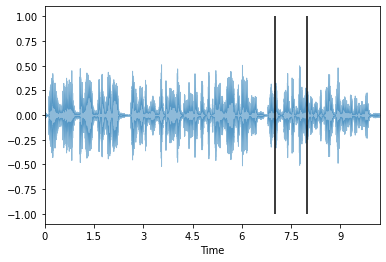

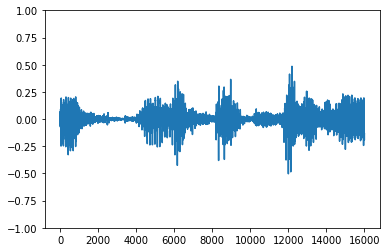

In [ ]:
start, end = 7, 8 # time window used to display vertical bar lines and zoom on the signal

librosa.display.waveplot(x, sr, alpha=0.5);
plt.vlines([start, end], -1, 1)

plt.figure()
plt.plot(x[start*sr:end*sr])
plt.ylim((-1, 1));

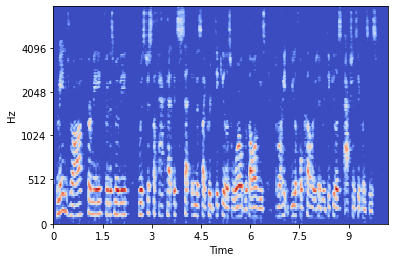

In [ ]:
stft = np.abs(librosa.stft(x, n_fft=2048, hop_length=512))
mel = librosa.feature.melspectrogram(sr=sr, S=stft**2)
log_mel = librosa.amplitude_to_db(mel)

librosa.display.specshow(log_mel, sr=sr, hop_length=512, x_axis='time', y_axis='mel');

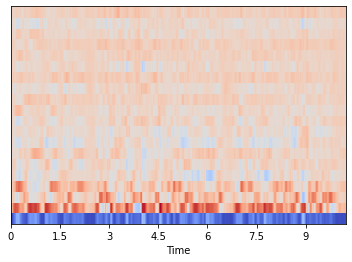

In [ ]:
mfcc = librosa.feature.mfcc(S=librosa.power_to_db(mel), n_mfcc=20)
mfcc = skl.preprocessing.StandardScaler().fit_transform(mfcc)
librosa.display.specshow(mfcc, sr=sr, x_axis='time');

## Construction de dataset audio 

### Features

Un seul fichier audio

In [ ]:
# Print features names
columns = ast.literal_eval(f['OpenSmile_emobase2010/metadata/dimension names'][()][0].decode('UTF-8'))
columns.insert(0, 'start_segment')
columns.insert(1, 'end_segment')
columns.insert(2, 'filename')
columns.insert(3, 'index')
columns.insert(1589, 'label')
print(columns)

['start_segment', 'end_segment', 'filename', 'index', 'frameIndex', 'frameTime', 'pcm_loudness_sma_maxPos', 'pcm_loudness_sma_minPos', 'pcm_loudness_sma_amean', 'pcm_loudness_sma_linregc1', 'pcm_loudness_sma_linregc2', 'pcm_loudness_sma_linregerrA', 'pcm_loudness_sma_linregerrQ', 'pcm_loudness_sma_stddev', 'pcm_loudness_sma_skewness', 'pcm_loudness_sma_kurtosis', 'pcm_loudness_sma_quartile1', 'pcm_loudness_sma_quartile2', 'pcm_loudness_sma_quartile3', 'pcm_loudness_sma_iqr1-2', 'pcm_loudness_sma_iqr2-3', 'pcm_loudness_sma_iqr1-3', 'pcm_loudness_sma_percentile1.0', 'pcm_loudness_sma_percentile99.0', 'pcm_loudness_sma_pctlrange0-1', 'pcm_loudness_sma_upleveltime75', 'pcm_loudness_sma_upleveltime90', 'pcm_fftMag_mfcc_sma[0]_maxPos', 'pcm_fftMag_mfcc_sma[0]_minPos', 'pcm_fftMag_mfcc_sma[0]_amean', 'pcm_fftMag_mfcc_sma[0]_linregc1', 'pcm_fftMag_mfcc_sma[0]_linregc2', 'pcm_fftMag_mfcc_sma[0]_linregerrA', 'pcm_fftMag_mfcc_sma[0]_linregerrQ', 'pcm_fftMag_mfcc_sma[0]_stddev', 'pcm_fftMag_mfcc_s

In [ ]:
def df_file(file):
  file_intervals = f['OpenSmile_emobase2010/data/' + file + '/intervals']
  file_features = f['OpenSmile_emobase2010/data/' + file + '/features']
  file_labels = f_['Opinion Segment Labels/data/' + file + '/features']
  intervals = np.array(file_intervals)
  features = np.array(file_features)
  labels = np.array(file_labels)
  filenames = np.array([file]*len(labels)).reshape((len(labels), 1))
  index = np.array([i for i in range(1, len(labels) + 1)]).reshape((len(labels), 1))
  intervals_features_labels = np.concatenate((intervals, filenames, index, features, labels), axis=1)
  df = pd.DataFrame(intervals_features_labels, columns=columns)
  return df

In [ ]:
df_file(example_file)

,start_segment,end_segment,filename,index,frameIndex,frameTime,pcm_loudness_sma_maxPos,pcm_loudness_sma_minPos,pcm_loudness_sma_amean,pcm_loudness_sma_linregc1,pcm_loudness_sma_linregc2,pcm_loudness_sma_linregerrA,pcm_loudness_sma_linregerrQ,pcm_loudness_sma_stddev,pcm_loudness_sma_skewness,pcm_loudness_sma_kurtosis,pcm_loudness_sma_quartile1,pcm_loudness_sma_quartile2,pcm_loudness_sma_quartile3,pcm_loudness_sma_iqr1-2,pcm_loudness_sma_iqr2-3,pcm_loudness_sma_iqr1-3,pcm_loudness_sma_percentile1.0,pcm_loudness_sma_percentile99.0,pcm_loudness_sma_pctlrange0-1,pcm_loudness_sma_upleveltime75,pcm_loudness_sma_upleveltime90,pcm_fftMag_mfcc_sma[0]_maxPos,pcm_fftMag_mfcc_sma[0]_minPos,pcm_fftMag_mfcc_sma[0]_amean,pcm_fftMag_mfcc_sma[0]_linregc1,pcm_fftMag_mfcc_sma[0]_linregc2,pcm_fftMag_mfcc_sma[0]_linregerrA,pcm_fftMag_mfcc_sma[0]_linregerrQ,pcm_fftMag_mfcc_sma[0]_stddev,pcm_fftMag_mfcc_sma[0]_skewness,pcm_fftMag_mfcc_sma[0]_kurtosis,pcm_fftMag_mfcc_sma[0]_quartile1,pcm_fftMag_mfcc_sma[0]_quartile2,pcm_fftMag_mfcc_sma[0]_quartile3,...,jitterDDP_sma_de_amean,jitterDDP_sma_de_linregc1,jitterDDP_sma_de_linregc2,jitterDDP_sma_de_linregerrA,jitterDDP_sma_de_linregerrQ,jitterDDP_sma_de_stddev,jitterDDP_sma_de_skewness,jitterDDP_sma_de_kurtosis,jitterDDP_sma_de_quartile1,jitterDDP_sma_de_quartile2,jitterDDP_sma_de_quartile3,jitterDDP_sma_de_iqr1-2,jitterDDP_sma_de_iqr2-3,jitterDDP_sma_de_iqr1-3,jitterDDP_sma_de_percentile99.0,jitterDDP_sma_de_upleveltime75,jitterDDP_sma_de_upleveltime90,shimmerLocal_sma_de_maxPos,shimmerLocal_sma_de_minPos,shimmerLocal_sma_de_amean,shimmerLocal_sma_de_linregc1,shimmerLocal_sma_de_linregc2,shimmerLocal_sma_de_linregerrA,shimmerLocal_sma_de_linregerrQ,shimmerLocal_sma_de_stddev,shimmerLocal_sma_de_skewness,shimmerLocal_sma_de_kurtosis,shimmerLocal_sma_de_quartile1,shimmerLocal_sma_de_quartile2,shimmerLocal_sma_de_quartile3,shimmerLocal_sma_de_iqr1-2,shimmerLocal_sma_de_iqr2-3,shimmerLocal_sma_de_iqr1-3,shimmerLocal_sma_de_percentile99.0,shimmerLocal_sma_de_upleveltime75,shimmerLocal_sma_de_upleveltime90,F0final__Turn_numOnsets,F0final__Turn_duration,class,label
0,51.904533,55.94535,03bSnISJMiM,1,0.0,0.0,0.7815385,0.2861539,0.1195709,0.0003545861,0.06212795,0.08808729,0.0112503,0.111162,1.329764,4.579884,0.02600131,0.09540454,0.1774243,0.06940322,0.08201978,0.151423,0.01152409,0.4990962,0.4875721,0.03076923,0.01538462,0.8861538,0.009230769,-80.73866,0.01511022,-83.18652,14.46382,262.4316,16.26165,0.5507119,1.878473,-95.38403,-87.30969,-67.88088,...,1.150185e-05,-3.500887e-06,0.0003265817,0.002637279,1.715188e-05,0.00414552,0.992534,10.38905,-0.001745856,-0.0001976833,0.001339877,0.001548173,0.001537561,0.003085734,0.01540758,0.01657459,0.005524862,0.7564767,0.7720207,0.0001164348,-3.014467e-05,0.003010323,0.02795419,0.00219287,0.0468582,0.5689048,7.972645,-0.01364951,-0.00209603,0.01317248,0.01155348,0.01526851,0.026822,0.1677165,0.02590674,0.01554404,8.0,3.27,0.0,2.4
1,56.045124,66.78072,03bSnISJMiM,2,0.0,0.0,0.1264591,0.5651751,0.1425692,-5.198806e-05,0.1692651,0.09828697,0.01296669,0.1149117,0.6246943,2.37713,0.03139051,0.1190631,0.229128,0.08767263,0.1100648,0.1977375,0.009663781,0.4163083,0.4066446,0.02723735,0.004863813,0.9085603,0.5992218,-79.15652,0.003992662,-81.20675,14.01536,254.4073,15.9941,0.3685918,1.909395,-94.28144,-81.52785,-64.60925,...,1.114545e-11,-5.025947e-07,0.0001515323,0.005415564,0.0001063285,0.01031194,0.3555611,10.17728,-0.002071206,-0.0002256666,0.00139948,0.001845539,0.001625147,0.003470685,0.03811476,0.02649007,0.006622517,0.4749216,0.4796238,-1.350272e-11,-2.764431e-06,0.0008804711,0.02657101,0.001727058,0.041561,0.5410878,6.609947,-0.01603926,-0.001028686,0.01190403,0.01501057,0.01293271,0.02794328,0.1267094,0.02037618,0.001567398,26.0,10.3,0.0,-0.8
2,66.78072,68.73628,03bSnISJMiM,3,0.0,0.0,0.4105263,0.6947368,0.1560267,-0.001302748,0.2791364,0.05740177,0.0056635,0.1037736,0.4805831,2.040875,0.06298015,0.1365084,0.241885,0.07352827,0.1053766,0.1789049,0.01841007,0.368449,0.3500

Tous les fichiers audio

In [ ]:
L_id = []
for dir in os.listdir('Transcript/Segmented'):
  L_id.append(dir.split('.')[0])
print(len(L_id))
print(L_id)

93
['fvVhgmXxadc', 'lXPQBPVc5Cw', 'Jkswaaud0hk', 'BioHAh1qJAQ', 'VbQk4H8hgr0', 'BXuRRbG0Ugk', 'G-xst2euQUc', '9T9Hf74oK10', 'wMbj6ajWbic', 'X3j2zQgwYgE', 'd3_k5Xpfmik', 'Clx4VXItLTE', '8d-gEyoeBzc', '1DmNV9C1hbY', 'c7UH_rxdZv4', 'G6GlGvlkxAQ', 'Njd1F0vZSm4', 'jUzDDGyPkXU', 'VCslbP0mgZI', 'dq3Nf_lMPnE', 'bOL9jKpeJRs', 'ZUXBRvtny7o', 'etzxEpPuc6I', '5W7Z1C_fDaE', 'tStelxIAHjw', 'nzpVDcQ0ywM', 'BvYR0L6f2Ig', 'Ci-AH39fi3Y', '0h-zjBukYpk', '9J25DZhivz8', '2iD-tVS8NPw', 'v0zCBqDeKcE', 'c5xsKMxpXnc', 'OtBXNcAL_lE', '8qrpnFRGt2A', '6_0THN4chvY', 'OQvJTdtJ2H4', 'QN9ZIUWUXsY', 'f_pcplsH_V0', 'Dg_0XKD0Mf4', 'Qr1Ca94K55A', 'cXypl4FnoZo', '6Egk_28TtTM', 'LSi-o-IrDMs', 'MLal-t_vJPM', 'Af8D0E4ZXaw', 'vvZ4IcEtiZc', '2WGyTLYerpo', 'Iu2PFX3z_1s', 'zhpQhgha_KU', 'Nzq88NnDkEk', 'tIrG4oNLFzE', 'Vj1wYRQjB-o', 'GWuJjcEuzt8', 'd6hH302o4v8', '9qR7uwkblbs', 'I5y0__X72p0', 'phBUpBr1hSo', '1iG0909rllw', 'atnd_PF-Lbs', 'rnaNMUZpvvg', 'aiEXnCPZubE', 'Sqr0AcuoNnk', 'bvLlb-M3UXU', 'WKA5OygbEKI', 'ZAIRrfG22O0', '8OtFt

In [ ]:
L_df = []
for i, file in enumerate(L_id):
  df_id = df_file(file)
  L_df.append(df_id)
dataset_audio = pd.concat(L_df, ignore_index=True)
dataset_audio_no_drop = dataset_audio

### Fichiers .wav

In [ ]:
waveform, sample_rate = torchaudio.load(filename)
print("Stereo signal -> waveform shape: ", waveform.shape)
waveform = torch.mean(waveform, dim=0).unsqueeze(0) # Take only the left channel
print("Mono signal -> waveform shape: ", waveform.shape)
print("Sampling rate: ", sample_rate)

# Transforming audio files into melspectrograms
transform = transforms.Compose([torchaudio.transforms.MelSpectrogram(sample_rate=sample_rate, n_fft=4096, hop_length=4096//4), transforms.Resize((128, 1200))]) 
melspectro = transform(waveform)
print("Melspectro shape: ", melspectro.shape)

Stereo signal -> waveform shape:  torch.Size([2, 163260])
Mono signal -> waveform shape:  torch.Size([1, 163260])
Sampling rate:  16000
Melspectro shape:  torch.Size([1, 128, 1200])


In [ ]:
class AudioDataset(Dataset):
    def __init__(self, audio_dir, file_names, track_ids, labels):
        self.labels = labels
        self.audio_dir = audio_dir
        self.file_names = file_names
        self.track_ids = track_ids

    def __len__(self):#taille du fichier
        return len(self.track_ids)

    def __getitem__(self, idx):
        label = self.labels[idx]
        audio_path = get_audio_path(self.audio_dir, self.file_names[idx], self.track_ids[idx])
        waveform, sample_rate = torchaudio.load(audio_path)
        waveform = torch.mean(waveform, dim=0).unsqueeze(0)#take only the left channel, de stéréo à mono
        #Transforming audio files into melspectrograms
        transform = transforms.Compose([torchaudio.transforms.MelSpectrogram(sample_rate=sample_rate, n_fft=4096, hop_length=4096//4), transforms.Resize((128, 1200))]) 

        melspectro = transform(waveform)

        return melspectro, label

## Analyse de données

### Analyse

In [ ]:
print(dataset_audio.shape)
print(dataset_audio.isna().sum())
print(dataset_audio.dtypes)
print(dataset_audio.info())
print(dataset_audio.describe())

(2199, 1590)
start_segment                        0
end_segment                          0
filename                             0
index                                0
frameIndex                           0
                                    ..
shimmerLocal_sma_de_upleveltime90    0
F0final__Turn_numOnsets              0
F0final__Turn_duration               0
class                                0
label                                0
Length: 1590, dtype: int64
start_segment                        object
end_segment                          object
filename                             object
index                                object
frameIndex                           object
                                      ...  
shimmerLocal_sma_de_upleveltime90    object
F0final__Turn_numOnsets              object
F0final__Turn_duration               object
class                                object
label                                object
Length: 1590, dtype: object
<class 'pandas.core

In [ ]:
print(dataset_audio['label'].value_counts())

2.0            120
-1.0           110
-2.0           103
0.0             96
1.8             94
2.2             94
1.4             92
-1.6            91
1.6             90
-1.4            79
0.8             77
-1.8            72
-1.2            71
-0.4            69
-0.8            68
1.2             68
0.6             63
1.0             62
0.4             62
0.2             61
-2.2            61
-0.6            55
-0.2            55
2.4             54
2.6             44
-2.4            40
-2.6            36
-2.8            32
2.8             29
-0.5            18
0.5             17
3.0             12
0.25            12
-3.0            12
-0.25           10
-1.5            10
-0.75            8
-1.25            8
1.25             7
1.75             4
-1.75            4
1.3333334        4
0.75             4
1.5              3
-0.6666667       3
-1.3333334       2
-0.33333334      2
0.6666667        2
2.25             2
-2.5             2
-2.25            2
2.5              2
0.33333334  

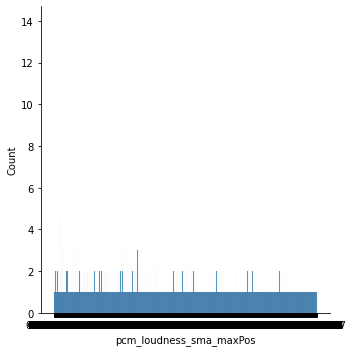

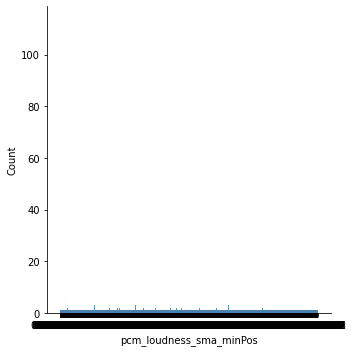

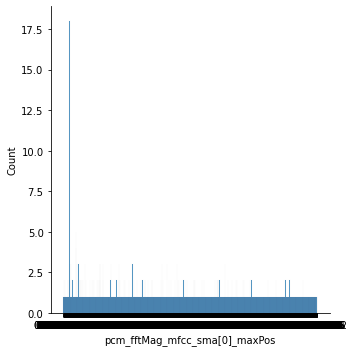

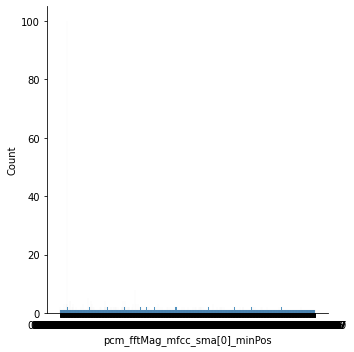

In [ ]:
sns.displot(dataset_audio, x='pcm_loudness_sma_maxPos')
sns.displot(dataset_audio, x='pcm_loudness_sma_minPos')
sns.displot(dataset_audio, x='pcm_fftMag_mfcc_sma[0]_maxPos')
sns.displot(dataset_audio, x='pcm_fftMag_mfcc_sma[0]_minPos')

ValueError: ignored

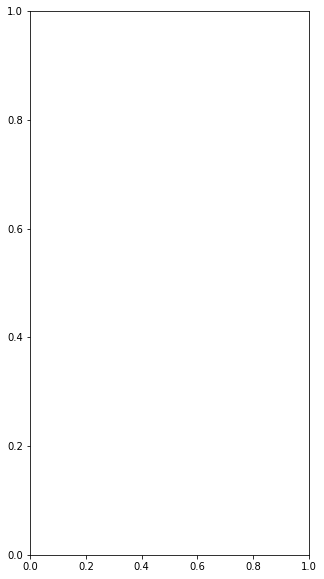

In [ ]:
corr = dataset_audio.corr()
corr.style.background_gradient(cmap='coolwarm')
fig, ax = plt.subplots(figsize=(5,10))
sns.heatmap(corr, annot=True, ax=ax)

In [ ]:
filenames = dataset_audio['filename'].to_list()
index = list(map(int, dataset_audio['index'].to_list()))
dataset_audio_no_drop = dataset_audio

KeyError: ignored

In [ ]:
dataset_audio = dataset_audio.drop(columns = ['filename', 'index','class', 'start_segment', 'end_segment', 'frameTime', 'frameIndex'])

In [ ]:
dataset_audio

,pcm_loudness_sma_maxPos,pcm_loudness_sma_minPos,pcm_loudness_sma_amean,pcm_loudness_sma_linregc1,pcm_loudness_sma_linregc2,pcm_loudness_sma_linregerrA,pcm_loudness_sma_linregerrQ,pcm_loudness_sma_stddev,pcm_loudness_sma_skewness,pcm_loudness_sma_kurtosis,pcm_loudness_sma_quartile1,pcm_loudness_sma_quartile2,pcm_loudness_sma_quartile3,pcm_loudness_sma_iqr1-2,pcm_loudness_sma_iqr2-3,pcm_loudness_sma_iqr1-3,pcm_loudness_sma_percentile1.0,pcm_loudness_sma_percentile99.0,pcm_loudness_sma_pctlrange0-1,pcm_loudness_sma_upleveltime75,pcm_loudness_sma_upleveltime90,pcm_fftMag_mfcc_sma[0]_maxPos,pcm_fftMag_mfcc_sma[0]_minPos,pcm_fftMag_mfcc_sma[0]_amean,pcm_fftMag_mfcc_sma[0]_linregc1,pcm_fftMag_mfcc_sma[0]_linregc2,pcm_fftMag_mfcc_sma[0]_linregerrA,pcm_fftMag_mfcc_sma[0]_linregerrQ,pcm_fftMag_mfcc_sma[0]_stddev,pcm_fftMag_mfcc_sma[0]_skewness,pcm_fftMag_mfcc_sma[0]_kurtosis,pcm_fftMag_mfcc_sma[0]_quartile1,pcm_fftMag_mfcc_sma[0]_quartile2,pcm_fftMag_mfcc_sma[0]_quartile3,pcm_fftMag_mfcc_sma[0]_iqr1-2,pcm_fftMag_mfcc_sma[0]_iqr2-3,pcm_fftMag_mfcc_sma[0]_iqr1-3,pcm_fftMag_mfcc_sma[0]_percentile1.0,pcm_fftMag_mfcc_sma[0]_percentile99.0,pcm_fftMag_mfcc_sma[0]_pctlrange0-1,...,jitterDDP_sma_de_minPos,jitterDDP_sma_de_amean,jitterDDP_sma_de_linregc1,jitterDDP_sma_de_linregc2,jitterDDP_sma_de_linregerrA,jitterDDP_sma_de_linregerrQ,jitterDDP_sma_de_stddev,jitterDDP_sma_de_skewness,jitterDDP_sma_de_kurtosis,jitterDDP_sma_de_quartile1,jitterDDP_sma_de_quartile2,jitterDDP_sma_de_quartile3,jitterDDP_sma_de_iqr1-2,jitterDDP_sma_de_iqr2-3,jitterDDP_sma_de_iqr1-3,jitterDDP_sma_de_percentile99.0,jitterDDP_sma_de_upleveltime75,jitterDDP_sma_de_upleveltime90,shimmerLocal_sma_de_maxPos,shimmerLocal_sma_de_minPos,shimmerLocal_sma_de_amean,shimmerLocal_sma_de_linregc1,shimmerLocal_sma_de_linregc2,shimmerLocal_sma_de_linregerrA,shimmerLocal_sma_de_linregerrQ,shimmerLocal_sma_de_stddev,shimmerLocal_sma_de_skewness,shimmerLocal_sma_de_kurtosis,shimmerLocal_sma_de_quartile1,shimmerLocal_sma_de_quartile2,shimmerLocal_sma_de_quartile3,shimmerLocal_sma_de_iqr1-2,shimmerLocal_sma_de_iqr2-3,shimmerLocal_sma_de_iqr1-3,shimmerLocal_sma_de_percentile99.0,shimmerLocal_sma_de_upleveltime75,shimmerLocal_sma_de_upleveltime90,F0final__Turn_numOnsets,F0final__Turn_duration,label
0,0.7894737,0.8631579,1.215116,-0.0003202202,1.291008,0.7204952,0.7764287,0.8822452,0.9922804,3.245213,0.494947,0.9394051,1.818959,0.4444581,0.8795539,1.324012,0.1817125,3.791585,3.609872,0.03789474,0.01263158,0.7852632,0.7368421,-23.42438,-0.01058665,-20.91534,15.18149,338.2168,18.44788,-0.143444,2.241526,-37.28423,-22.97945,-9.950669,14.30478,13.02878,27.33356,-62.97427,13.34915,76.32342,...,0.685567,-1.854807e-10,-8.57277e-06,0.0008272721,0.01078197,0.000964939,0.03106718,-0.07917526,23.77731,-0.002701659,-0.000217478,0.002232024,0.002484181,0.002449502,0.004933682,0.1193827,0.01546392,0.005154639,0.5396826,0.5777778,-4.880592e-05,-9.678556e-06,0.001470727,0.02654905,0.001298697,0.03604818,0.2225932,4.24799,-0.02008379,-0.003548651,0.01961746,0.01653513,0.02316611,0.03970125,0.09675821,0.07619048,0.01587302,26.0,4.77,-0.4
1,0.2702703,0.4674086,1.161863,7.318186e-05,1.138884,0.715984,0.7939504,0.8911381,1.095201,3.518823,0.4570903,0.9075502,1.638985,0.4504599,0.7314345,1.181894,0.1607333,3.606906,3.446173,0.03497615,0.004769475,0.4101749,0.3497615,-26.25701,0.0122392,-30.10012,15.19876,329.1547,18.27822,-0.5523099,2.210026,-39.32961,-21.50371,-12.27645,17.82589,9.227266,27.05316,-64.18655,1.297744,65.4843,...,0.01851852,6.02645e-05,-4.680174e-07,0.0001358493,0.005339527,7.5018e-05,0.008661403,0.2854251,5.823475,-0.002333132,-0.000203676,0.002073259,0.002129456,0.002276935,0.004406392,0.02477365,0.02777778,0.00308642,0.36,0.5129412,0.0005865626,5.300569e-07,0.0004741905,0.03752095,0.00336958,0.05804812,0.2780844,5.61548,-0.02031362,-0.002850479,0.01718638,0.01746314,0.02003686,0.03749999,0.1750603,0.0517647,0.02352941,28.0,6.31,-2.8
2,0.6390532,0.9763314,1.114313,-0.006628018,1.671066,0.5942774,0.

### Réduction de dimentionnalité

In [ ]:
features_columns = dataset_audio.columns
features_columns = features_columns.drop('label')
features = dataset_audio[features_columns].to_numpy()
target_column = 'label'

In [ ]:
#target = np.around(dataset_audio[target_column].to_numpy().astype(np.float32)) + 3
target = dataset_audio[target_column].to_numpy().astype(np.float32)

In [ ]:
rf = RandomForestRegressor(n_estimators=150)
rf.fit(features, target)

RandomForestRegressor(n_estimators=150)

Text(0.5, 0, 'Feature Importance')

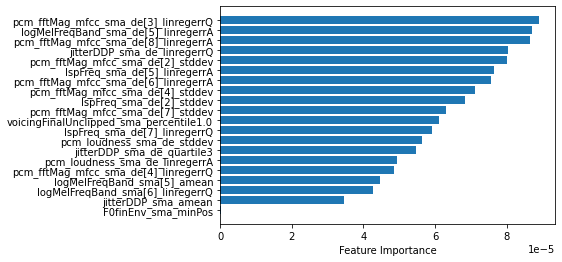

In [ ]:
sort = rf.feature_importances_.argsort()
plt.barh(features_columns[sort[:20]], rf.feature_importances_[sort][:20])
plt.xlabel("Feature Importance")

In [ ]:
sort[:20]

array([ 673, 1468,  468,  443,  825,  719, 1554,  721, 1371,  709,  889,
       1267,  826,  866, 1328,  784, 1548,  908, 1160,  804])

In [ ]:
features_columns[sort[:20]]

Index(['F0finEnv_sma_minPos', 'jitterDDP_sma_amean',
       'logMelFreqBand_sma[6]_linregerrQ', 'logMelFreqBand_sma[5]_amean',
       'pcm_fftMag_mfcc_sma_de[4]_linregerrQ',
       'pcm_loudness_sma_de_linregerrA', 'jitterDDP_sma_de_quartile3',
       'pcm_loudness_sma_de_stddev', 'lspFreq_sma_de[7]_linregerrQ',
       'voicingFinalUnclipped_sma_percentile1.0',
       'pcm_fftMag_mfcc_sma_de[7]_stddev', 'lspFreq_sma_de[2]_stddev',
       'pcm_fftMag_mfcc_sma_de[4]_stddev',
       'pcm_fftMag_mfcc_sma_de[6]_linregerrA', 'lspFreq_sma_de[5]_linregerrA',
       'pcm_fftMag_mfcc_sma_de[2]_stddev', 'jitterDDP_sma_de_linregerrQ',
       'pcm_fftMag_mfcc_sma_de[8]_linregerrA',
       'logMelFreqBand_sma_de[5]_linregerrA',
       'pcm_fftMag_mfcc_sma_de[3]_linregerrQ'],
      dtype='object')

In [ ]:
new_features = np.transpose(np.transpose(features)[sort[:10]]).astype(np.float64)

## Préparation de dataset de training, validation et test : Features

In [ ]:
target = np.around(dataset_audio[target_column].to_numpy().astype(np.float32)) + 3
#target = dataset_audio[target_column].to_numpy().astype(np.float32)

In [ ]:
features, target = skl.utils.shuffle(features, target, random_state=42)

In [ ]:
#donne les meilleurs résultats
sc = StandardScaler()
new_features = sc.fit_transform(new_features)

In [ ]:
new_features = preprocessing.normalize(new_features)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_features, target, test_size=0.33)
X_valid = X_train[: 150]
y_valid = y_train[: 150]
X_train = X_train[150 :]
y_train = y_train[150 :]
print("train set shape : ", X_train.shape, y_train.shape)
print("valid set shape : ",X_valid.shape, y_valid.shape)
print("test set shape : ",X_test.shape, y_test.shape)

train set shape :  (1323, 10) (1323,)
valid set shape :  (150, 10) (150,)
test set shape :  (726, 10) (726,)


In [ ]:
#convert to tenser

targets = np.unique(y_train)

train_tensor_x = torch.Tensor(X_train)
train_tensor_y = torch.Tensor(y_train)

valid_tensor_x = torch.Tensor(X_valid)
valid_tensor_y = torch.Tensor(y_valid)

test_tensor_x = torch.Tensor(X_test)
test_tensor_y = torch.Tensor(y_test)
 
#create dataset and dataloader

train_dataset = TensorDataset(train_tensor_x, train_tensor_y)
valid_dataset = TensorDataset(valid_tensor_x, valid_tensor_y)
test_dataset = TensorDataset(test_tensor_x, test_tensor_y)

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=16, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [ ]:
print("classes shape :", targets.shape)

classes shape : (7,)


In [ ]:
for batch_id,  batch in enumerate(train_dataloader) : 
  inputs, labels  = batch
  print(inputs)
  print(labels)

tensor([[-2.1354e-02, -8.0880e-03, -3.5832e-01,  6.2984e-01, -1.5863e-02,
          4.0896e-01, -1.7209e-01,  3.6065e-01, -2.8983e-01, -2.5141e-01],
        [-3.1552e-02, -4.6118e-03, -2.4021e-01, -4.9216e-01, -4.0036e-01,
         -4.2774e-01, -9.1064e-02, -4.5772e-01,  3.2214e-03, -3.7147e-01],
        [-3.1490e-02, -7.4354e-02, -4.3938e-01,  2.9648e-01, -6.7453e-01,
          2.2896e-01, -1.2613e-01,  2.2722e-01, -1.0931e-02, -3.7075e-01],
        [-2.2332e-02, -8.7523e-02,  1.8064e-01, -9.9980e-02,  8.3865e-01,
         -1.8760e-01, -9.9666e-02, -2.3688e-01, -2.7480e-01, -2.6293e-01],
        [-2.4033e-02,  4.3396e-02,  2.5591e-01, -2.3721e-01, -2.1436e-01,
         -2.0950e-01,  1.6784e-01, -1.4012e-01, -7.7792e-02,  8.5562e-01],
        [-1.9405e-02, -1.3907e-01,  3.3887e-02, -6.7329e-01, -2.9559e-02,
         -4.5722e-01, -1.1684e-01, -4.6616e-01, -1.8093e-01, -2.2847e-01],
        [-2.3379e-02, -1.3114e-02, -3.1254e-01, -5.3123e-01, -1.5181e-01,
         -4.4800e-01, -1.1204e-0

## Préparation de dataset de training, validation et test : Fichiers .wav

In [ ]:
filenames_train, filenames_test, index_train, index_test, y_train, y_test = train_test_split(np.array(filenames), np.array(index), target, test_size=0.33)
filenames_valid = filenames_train[: 150]
index_valid = index_train[: 150]
y_valid = y_train[: 150]
filenames_train = filenames_train[150 :]
index_train = index_train[150 :]
y_train = y_train[150 :]
print("train set shape : ", filenames_train.shape, y_train.shape)
print("valid set shape : ",filenames_valid.shape, y_valid.shape)
print("test set shape : ",filenames_test.shape, y_test.shape)

train set shape :  (1323,) (1323,)
valid set shape :  (150,) (150,)
test set shape :  (726,) (726,)


In [ ]:
AUDIO_DIR = "/content/Audio/WAV_16000/Segmented"

# Create datasets
train_set = AudioDataset(AUDIO_DIR, filenames_train, index_train, y_train)
valid_set = AudioDataset(AUDIO_DIR, filenames_valid, index_valid, y_valid)
test_set = AudioDataset(AUDIO_DIR, filenames_test, index_test, y_test)


# Create data loaders
trainloader = DataLoader(train_set, batch_size=64, shuffle=True, num_workers=0)
validloader = DataLoader(valid_set, batch_size=8, shuffle=True, num_workers=0)
testloader = DataLoader(test_set, batch_size=16, shuffle=True, num_workers=0)

## Implémentation des modèles 

### Regression : Features

MLPRegressor

In [ ]:
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
y_pred = regr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print("MAE: %f" % (mae))
print(np.mean(1*np.not_equal(np.around(y_pred), np.around(y_test))))

MAE: 1.426894
0.8264462809917356


LinearRegression

In [ ]:
clf = LinearRegression()
clf.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = clf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE: %f" % (mae))
print(np.mean(1*np.not_equal(np.around(y_pred), np.around(y_test))))

MAE: 1.373134
0.8223140495867769


XGBoost

In [ ]:
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE: %f" % (mae))
print(np.mean(1*np.not_equal(np.around(y_pred), np.around(y_test))))

[12:58:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 1.506354
0.7988980716253443


ANN

In [ ]:
model = Sequential()
model.add(Dense(250,input_shape=(10,)))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('relu'))
model.summary()
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mean_squared_error'])

#apprentissage
model.fit(X_train, y_train, epochs = 5, batch_size = 32, validation_data=(X_valid, y_valid))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 250)               2750      
                                                                 
 activation_6 (Activation)   (None, 250)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                2510      
                                                                 
 activation_7 (Activation)   (None, 10)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
 activation_8 (Activation)   (None, 1)                 0         
                                                                 
Total params: 5,271
Trainable params: 5,271
Non-traina

In [ ]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE: %f" % (mae))
print(np.mean(1*np.not_equal(np.around(y_pred), np.around(y_test))))

MAE: 1.382677
0.8209632007528326


Récupère l'index 473, ligne qui a le plus mauvais résultat pour la concaténation

In [ ]:
y_pred = rf.predict(features)
abs_er = abs(y_pred-dataset_audio_no_drop['label'].astype(float))


i = 473
print(i)
print(abs_er[i])
print(y_pred[i], dataset_audio_no_drop['label'][i])

#len(features)

#print(len(dataset_audio))
print(dataset_audio_no_drop['filename'][i], dataset_audio_no_drop['start_segment'][i], dataset_audio_no_drop['end_segment'][i])

473
1.100666666328907
-1.499333333671093 -2.6
VCslbP0mgZI 114.02335 133.25964


### Classification : Features

RF

In [ ]:
rf = RandomForestClassifier(max_depth=10,min_samples_split=2).fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print("MAE: %f" % (mae))
print(np.mean(1*np.not_equal(np.around(y_pred), np.around(y_test))))

Decision Tree

In [ ]:
my_tree = tree.DecisionTreeClassifier().fit(X_train, y_train)
y_pred = my_tree.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print("MAE: %f" % (mae))
print(np.mean(1*np.not_equal(np.around(y_pred), np.around(y_test))))

SVC

In [ ]:
svc = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print("MAE: %f" % (mae))
print(np.mean(1*np.not_equal(np.around(y_pred), np.around(y_test))))

ANN : Classification

In [ ]:
D_in = 10 # input dimension : nb de features
D_out = 7     # output dimension : nb de classes

# Numbers of neurons for the two layers
H = 1000
H2 = 500

class MyModel(torch.nn.Module):
  def __init__(self, D_in, H, H2, D_out):
    super(MyModel, self).__init__()
    #self.flatten = torch.nn.Flatten()
    self.lin1 = torch.nn.Linear(D_in, H) #transformation linéaire
    self.lin2 = torch.nn.Linear(H, H2)
    self.lin3 = torch.nn.Linear(H2, D_out)

  def forward(self, x):
    """
      x : [batch_size, 1, height, width ]
    """
    #x = self.flatten(x) # [batch_size, 1 * width * height]
    x = F.relu( self.lin1(x) ) # application de fonction d'activation
    x = F.relu( self.lin2(x) )
    x = self.lin3(x)

    return x
model = MyModel(D_in, H, H2, D_out)

In [ ]:
def train_optim(model, epochs, log_frequency, device):

  model.to(device) # we make sure the model is on the proper device

  # Multiclass classification setting, we use cross-entropy
  # note that this implementation requires the logits as input 
  # logits: values prior softmax transformation 
  loss_fn = torch.nn.CrossEntropyLoss(reduction='mean') #comporte le softmax

  learning_rate = 1e-4 # hyperparamètre, le pas de mise à jour de paramètres du gradient

  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) # mettre à jour les paramètres du modèle
  
  for t in range(epochs):

      model.train() # we specify that we are training the model

      # At each epoch, the training set will be processed as a set of batches
      for batch_id,  batch in enumerate(train_dataloader) : 

        inputs, labels  = batch

        labels = labels.type(torch.LongTensor)

        # we put the data on the same device
        inputs, labels = inputs.to(device), labels.to(device)  
        
        y_pred = model(inputs) # forward pass output=logits

        loss = loss_fn(y_pred, labels) # pourquoi cross entroy car elle est différenciée, les prédictions et les attendus

        if batch_id % log_frequency == 0:
            print("epoch: {:03d}, batch: {:03d}, loss: {:.3f} ".format(t+1, batch_id+1, loss.item()))

        optimizer.zero_grad() # clear the gradient before backward
        loss.backward()       # update the gradient

        optimizer.step() # update the model parameters using the gradient, restocker les nouvelles valeurs de gradient

      # Model evaluation after each step/epoch computing the accuracy
      model.eval() #exploitation du modèle sur le val set
      total = 0
      correct = 0 #accuracy
      for batch_id, batch in enumerate(valid_dataloader):
        inputs , labels = batch
        inputs , labels = inputs.to(device), labels.to(device)
        y_pred = model(inputs) # forward computes the logits
        sf_y_pred = torch.nn.Softmax(dim=1)(y_pred) # softmax to obtain the probability distribution
        _, predicted = torch.max(sf_y_pred , 1)     # decision rule, we select the max
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
      
      print("[validation] accuracy: {:.3f}%\n".format(100 * correct / total))

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
train_optim(model, epochs=5, log_frequency=60, device=device)

In [ ]:
y_pred = model(test_tensor_x)
sf_y_pred = torch.nn.Softmax(dim=1)(y_pred) # softmax to obtain the probability distribution
_, predicted = torch.max(sf_y_pred , 1)
print(np.sqrt(mean_squared_error(y_test, predicted)))

In [ ]:
size_dataset = 2199
# Adding the size of the input layer
inputs = Input(shape=(D_in,))

# Adding the first hidden layer
x = Dense(H, activation='relu')(inputs)
# Adding dropout to prevent overfitting
x = Dropout(0.2) (x)

# Adding the second hidden layer
x = Dense(H, activation='relu')(x)
# Adding dropout to prevent overfitting
x = Dropout(0.2) (x)

# Adding the output layer
predictions = Dense(1, activation='softmax')(x)

# Creating a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Showing the summary
model.summary()

# Fitting the ANN to the Training set
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_valid, y_valid))

print("\nEvaluation")
model.evaluate(X_test, y_test)

### Classification : .wav

CNN

In [ ]:
# Define the model
class CNNNetwork(nn.Module):

    def __init__(self):
        super().__init__()
        # 4 conv blocks / flatten / linear / softmax
        self.conv1 = nn.Sequential(nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3), nn.ReLU(), nn.MaxPool2d(kernel_size=2))
        self.conv2 = nn.Sequential(nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3), nn.ReLU(), nn.MaxPool2d(kernel_size=2))
        self.conv3 = nn.Sequential(nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3), nn.ReLU(), nn.MaxPool2d(kernel_size=2))
        self.conv4 = nn.Sequential(nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3), nn.ReLU(), nn.MaxPool2d(kernel_size=2))
        self.flatten = nn.Flatten()
        self.linear = nn.Linear(128 * 6 * 73, 7)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, input_data):
        x = self.conv1(input_data)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        #print("x.shape: ", x.shape)
        x = self.flatten(x)
        logits = self.linear(x)
        return logits

In [ ]:

def train_loop(dataloader, model, loss_fn, optimizer):

    size = len(dataloader.dataset)
    print("Size: ", size)
    num_batches = len(dataloader)
    print("Number of batches: ", num_batches)
    model.train()
    train_loss, correct = 0, 0    
    for batch_number, (images, labels) in enumerate(dataloader):

        # Compute prediction error
        labels = labels.type(torch.LongTensor)
        images, labels = images.to(device), labels.to(device)
        pred = model(images)
        loss = loss_fn(pred, labels)
        train_loss += loss
        correct += (pred.argmax(1) == labels).type(torch.float).sum().item()

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_number % 10 == 0:
            loss, current = loss.item(), batch_number * len(images)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    
    train_loss /= num_batches
    correct /= size
    print(f"Train : \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {train_loss:>8f}")

In [ ]:
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for images, labels in dataloader:
            labels = labels.type(torch.LongTensor)
            images, labels = images.to(device), labels.to(device)
            pred = model(images)
            test_loss += loss_fn(pred, labels).item()
            correct += (pred.argmax(1) == labels).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test : \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

model = CNNNetwork()

learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(trainloader, model, loss_fn, optimizer)
    test_loop(testloader, model, loss_fn)
print("Done!")